# 🕊️ Memory Classifier: Imagination, Recall, and Retelling

Understanding the relationship between *memories and storytelling* holds profound significance as storytelling serves as a mechanism for humans to share experiences shaping our culture and communication. Imagination, recollection, and retelling rely on different cognitive and memory processes, thereby suggesting that this distinction might also be reflected in the language employed during the process of storytelling.

In this study, we explored the intricate interplay between memory processes and storytelling by contrasting narratives derived from imagined, recalled, and retold stories using "Hippocorpus", a comprehensive dataset of 6,854 English diary-like short stories (Sap et al., 2022), and by leveraging the capabilities of the most recent Natural Language Processing (NLP) techniques and Deep Learning algorithms.

Firstly, as a baseline in our project, we implemented a **Machine Learning** approach using several classifiers fed with a bag-of-words (bow) and term frequency- inverse document frequency (tf-idf) representation of our textual data, achieving 53% accuracy.

Secondly, we build a **fully connected deep neural network** (i.e., Multilayer Perceptron) featuring one embedding layer, a hidden layer, and an output layer. The vectorized inputs fed into our custom-built classification model were computed using three distinct word embedding algorithms such as **Glove, Fasttext, and Word2vec**, which allowed us to convert our textual data into vectors.  As a result, our model achieved an average accuracy of approximately 50%.

Deep learning techniques still offer a promising avenue for investigating and classifying narratives originating from different types of memory. By continually refining our approach, e.g., using regularization methods, leveraging data augmentation and sampling techniques, and by exploring more advanced methodologies, such as **Recurrent Neural Network (RNN), Long-Short Term Memory models (LSTM), Transformer models or fine-tuning pre-trained Large Language Models (LLM)**, we aim to enhance the accuracy and richness of our understanding.








In [67]:
# Data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
import os
import random
from collections import Counter

# 🕵️ Load and Explore data

In [68]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# Load data
data = pd.read_excel('/content/drive/MyDrive/neuromatch/hcV3-stories.xlsx')

# Visualize the first 5 rows
data.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,memType,mostSurprising,openness,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,4499809670330260,attending a show,imagined,when I got concert tickets,0.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,237K2NI1,25.0,woman,white,1.0,1.0,3.0,4.0,4499809670330260,a concert.,recalled,we saw the beautiful sky.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,NaN,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,5010635294096250,my sister having her twins a little early,imagined,she went into labor early,0.50,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,UYOSBBRS,30.0,woman,white,1.0,4.0,3.0,5.0,5010635294096250,meeting my twin niece and nephew.,recalled,finding out they were healthy.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,NaN,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,34011973816621500,the consequences of going to burning man,imagined,When I don't answer the phone in case I owe th...,0.25,NaN,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0


In [70]:
# rows, columns
data.shape

(6854, 23)

In [71]:
# Zooming in on main columns
data[['memType','recImgPairId','story','mainEvent','summary']].head();

In [72]:
# Percentage of missing values
data.isna().sum().sort_values(ascending = False).head() / len(data) * 100

recAgnPairId        61.803327
similarityReason    59.819084
similarity          59.819084
frequency           40.210096
recImgPairId        22.293551
dtype: float64

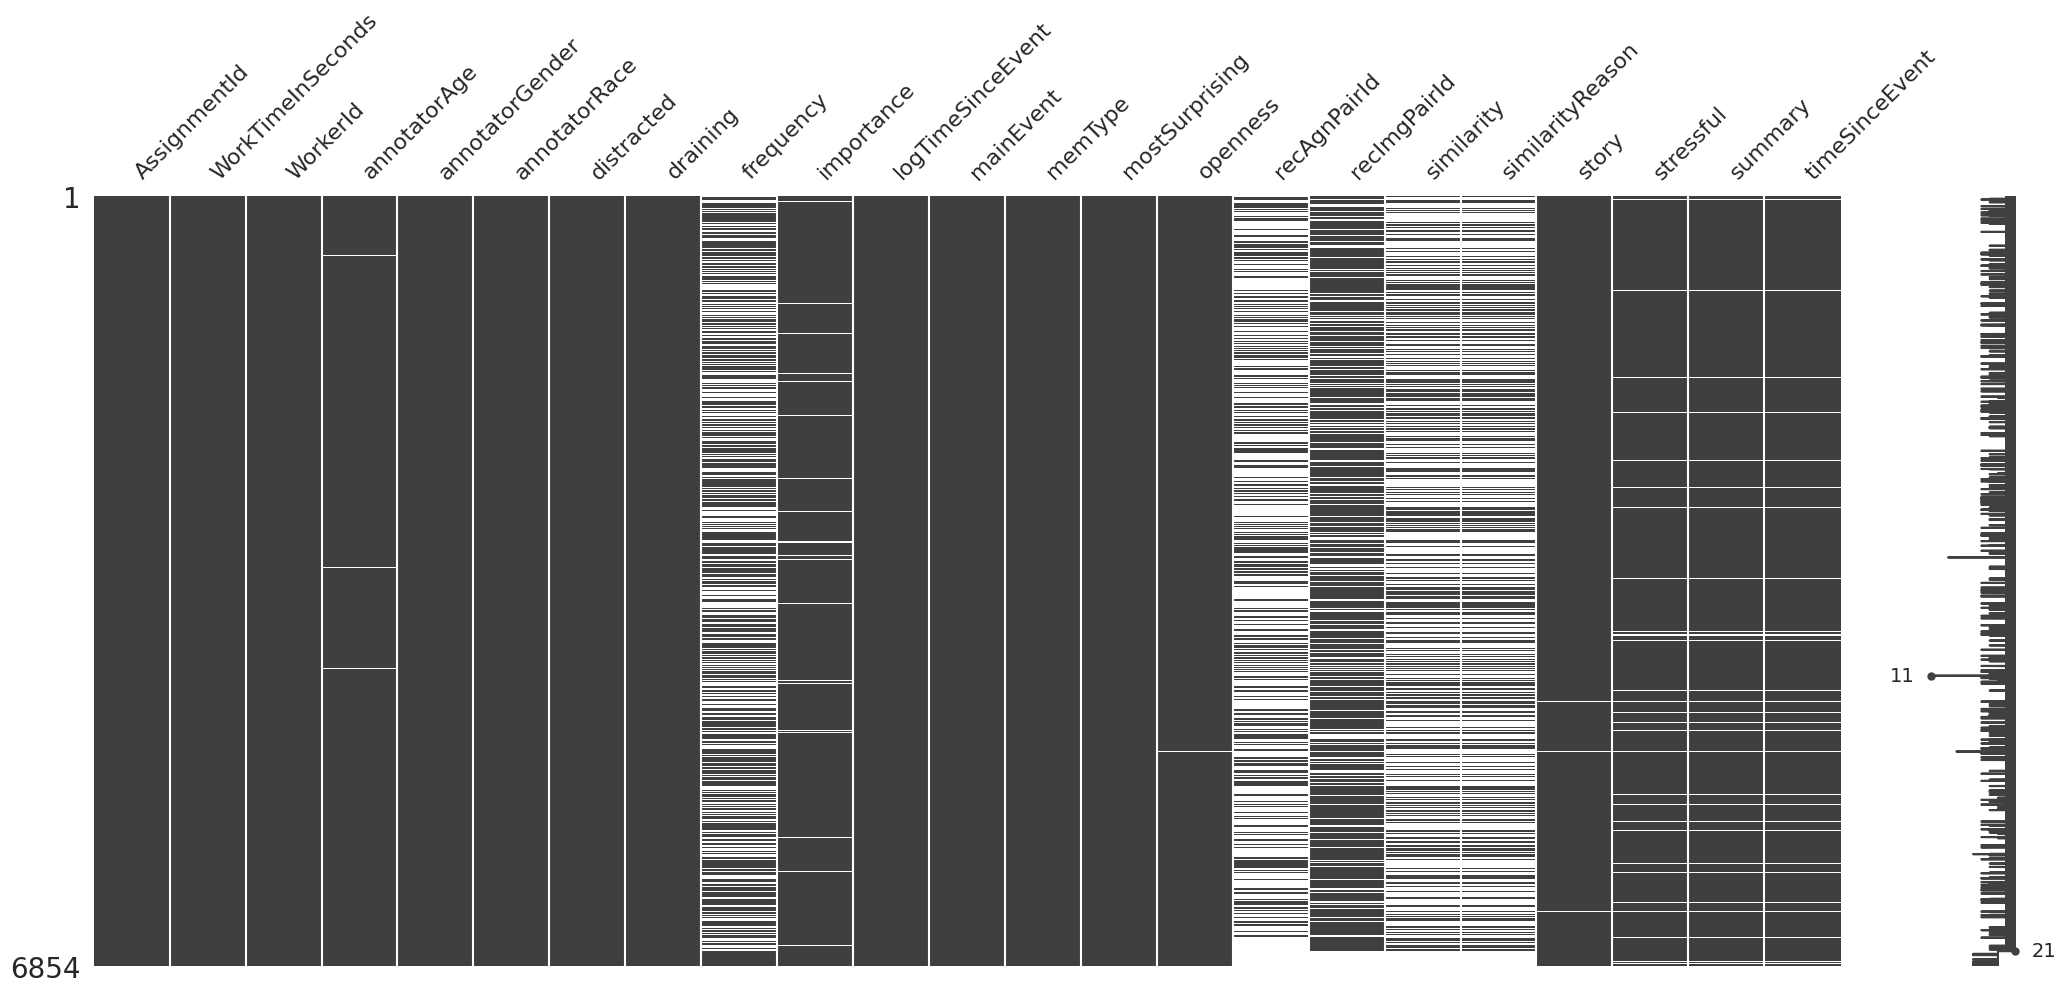

In [73]:
import missingno as msno
msno.matrix(data);

# Alternatively, you can use a heatmap to visualize missing data
# sns.heatmap(data.isnull(), cbar=False)

In [74]:
# Dropping missing values from story and memType
data = data.dropna(subset=['story', 'memType'])

In [75]:
data['memType'].unique()

array(['imagined', 'recalled', 'retold'], dtype=object)

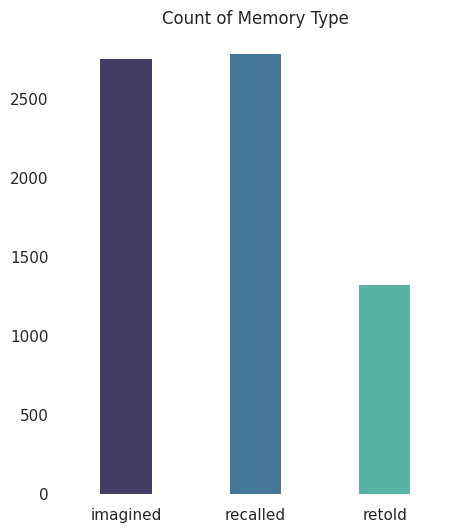

In [76]:
# Distribution of classes
plt.figure(figsize=(5, 6))
sns.set(style="ticks", rc={"axes.grid": False})
ax = sns.countplot(x = data['memType'], linewidth=0, width=0.4, palette='mako', dodge=1)

# labels
plt.title("Count of Memory Type")
plt.xlabel('')
plt.ylabel('')
ax.tick_params(left=False, bottom=False)
sns.despine(left=True, bottom=True)

In [77]:
# Filling in NAs
data[['frequency','similarity']] = data[['frequency','similarity']].fillna(0)

In [78]:
data_encoded = pd.get_dummies(data, columns=['annotatorGender','annotatorRace','memType'])
data_encoded.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,distracted,draining,frequency,importance,logTimeSinceEvent,mainEvent,mostSurprising,openness,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,annotatorGender_man,annotatorGender_na,annotatorGender_nonBinary,annotatorGender_other,annotatorGender_transman,annotatorGender_transwoman,annotatorGender_woman,annotatorRace_asian,annotatorRace_black,annotatorRace_hisp,annotatorRace_indian,annotatorRace_islander,annotatorRace_middleEastern,annotatorRace_na,annotatorRace_native,annotatorRace_other,annotatorRace_white,memType_imagined,memType_recalled,memType_retold
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,1.0,1.0,0.0,3.0,4499809670330260,attending a show,when I got concert tickets,0.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,237K2NI1,25.0,1.0,1.0,3.0,4.0,4499809670330260,a concert.,we saw the beautiful sky.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,0.0,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,1.0,1.0,0.0,4.0,5010635294096250,my sister having her twins a little early,she went into labor early,0.50,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,UYOSBBRS,30.0,1.0,4.0,3.0,5.0,5010635294096250,meeting my twin niece and nephew.,finding out they were healthy.,1.00,NaN,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,0.0,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,2.0,2.0,0.0,3.0,34011973816621500,the consequences of going to burning man,When I don't answer the phone in case I owe th...,0.25,NaN,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


<Figure size 2000x1000 with 0 Axes>

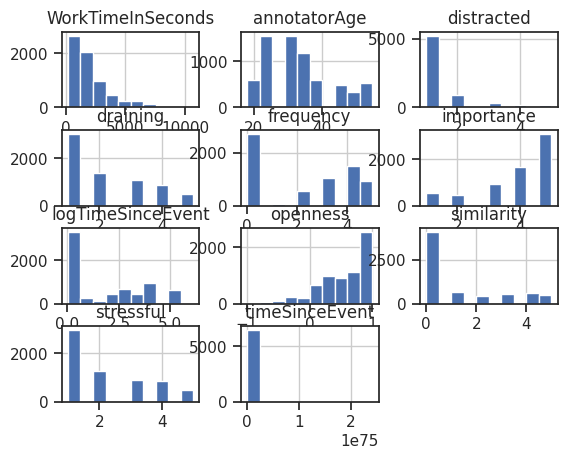

In [79]:
# Viewing numerical variables
plt.figure(figsize=(20, 10))
data.hist();

In [80]:
# Target - Distribution
data['memType'].value_counts();

<ipython-input-81-18e16800370c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_encoded.corr()


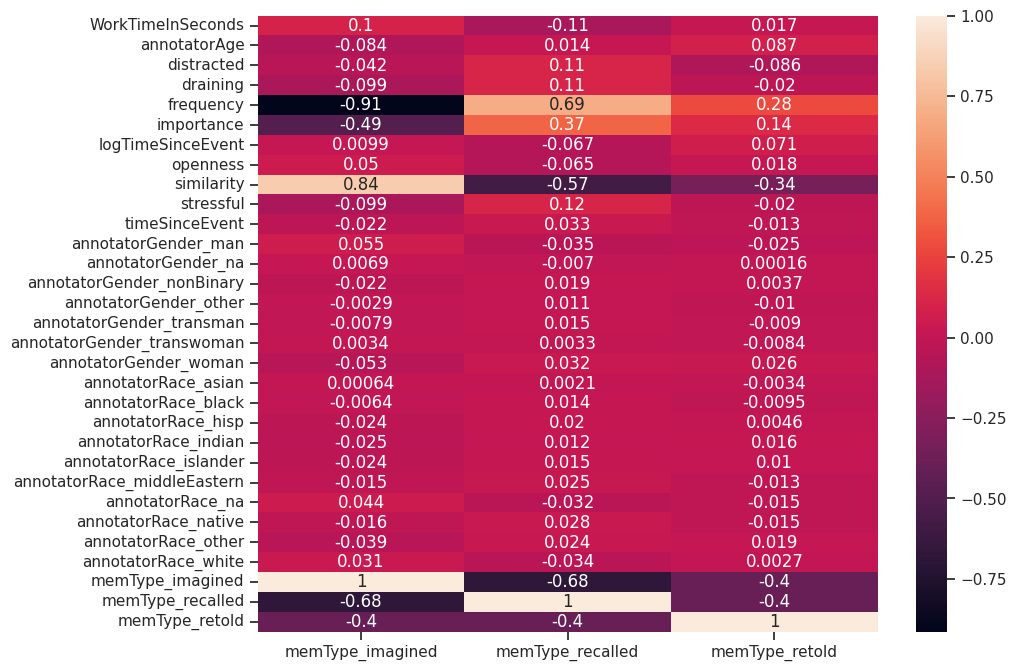

In [81]:
corr = data_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr[['memType_imagined','memType_recalled','memType_retold']], annot=True)
plt.show();

# 🤖 Machine Learning

## 🖋️ Text Preprocessing

In [82]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

# Load Spacy's English language model
# Download (large) English Pipeline from spacy
!python -m spacy download en_core_web_lg;
nlp = spacy.load("en_core_web_lg")

2023-07-27 22:00:23.582559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [83]:
docs = []

for doc in nlp.pipe(data['story'], n_process=os.cpu_count()-1, batch_size=200, disable = ["transformer", "ner", "textcat"]):
    docs.append(doc)

**🔠 Preprocessing steps:**

- Lower case
- Tokenization
- Remove punctuation
- Remove stop words
- Lemmatization


In [84]:
# Define a function to lemmatize content words
def preprocess_text(doc):
    # Lowercase and remove punctuation, double space, stop words and lemmatize text:
    clean_tokens = [token.lemma_.lower() for token in doc if not (token.is_punct or token.is_space or token.is_stop)]
    # Join the cleaned tokens back into a string
    clean_text = " ".join(clean_tokens)
    return clean_tokens, clean_text

In [85]:
# Apply the preprocessing pipeline using nlp.pipe
clean_tokens = []
clean_text = []

for doc in docs:
    tokens, text = preprocess_text(doc)
    clean_tokens.append(tokens)
    clean_text.append(text)

In [86]:
# Add the preprocessed text and tokens as new columns in df
data['story_preprocessed'] = clean_text
data['story_tokens'] = clean_tokens

In [87]:
all_tokens = [token for tokens in clean_tokens for token in tokens]
unique_tokens = set(all_tokens)

In [88]:
len(set(unique_tokens))

19693

🧮 **Compute the number of words in each story**

In [89]:
# Number of words per story:
data['word_count'] = [len(text.split()) for text in data['story_preprocessed']]

In [90]:
# Compute the minimum, maximum, average and std number of word for all the stories
print('All stories in Hippocorpus')
print()
data['word_count'].describe()

All stories in Hippocorpus



count    6843.000000
mean       95.489990
std        35.607477
min         0.000000
25%        71.000000
50%        91.000000
75%       115.000000
max       251.000000
Name: word_count, dtype: float64

In [91]:
# split real and imagined stories
data_recalled = data[data['memType']=='recalled']
data_imagined = data[data['memType']=='imagined']
data_retold = data[data['memType']=='retold']

In [92]:
# Compute the minimum, maximum, average and std number of word for RECALLED the stories
print('Recalled Stories')
print()
data_recalled['word_count'].describe()

Recalled Stories



count    2779.000000
mean      100.847427
std        36.453800
min         0.000000
25%        76.000000
50%        96.000000
75%       121.000000
max       251.000000
Name: word_count, dtype: float64

In [93]:
# Compute the minimum, maximum, average and std number of word for IMAGINED the stories
print('Imagined stories')
print()
data_imagined['word_count'].describe()

Imagined stories



count    2746.000000
mean       88.869629
std        34.447211
min         2.000000
25%        64.000000
50%        84.000000
75%       107.000000
max       240.000000
Name: word_count, dtype: float64

In [94]:
# Compute the minimum, maximum, average and std number of word for RETOLD the stories
print('Retold stories')
print()
data_retold['word_count'].describe()

Retold stories



count    1318.000000
mean       97.987102
std        33.947017
min         2.000000
25%        75.000000
50%        93.000000
75%       116.750000
max       247.000000
Name: word_count, dtype: float64

## 🗃️ Min-Max number of words in Hippocorpus

------------------------------------------------------

---


🚫 **Delete the stories with length below Q1-1.5*IQR and which are above Q3 + 1.5*IQR**

Recompute the same analysis with the filtered dataset.

In [95]:
Q1 = np.percentile(data['word_count'], 25)
Q3 = np.percentile(data['word_count'], 75)
IQR = Q3 - Q1

min_thr = Q1 - 1.5*IQR
max_thr = Q3 + 1.5*IQR

In [96]:
# Let's check the stories that have number of words below 2.5 std
data[data['word_count'] < min_thr].loc[:,['memType','story','story_preprocessed','word_count']].sort_values('word_count', ascending=True, inplace=False)

,memType,story,story_preprocessed,word_count
2685,recalled,This was it,,0
236,retold,"She is my oldest ""stepdaughter""",old stepdaughter,2
739,recalled,I was bored with my job,bored job,2
868,imagined,She stands in the front of the church,stand church,2
2012,imagined,Two months ago I did it,month ago,2
2574,recalled,"Dear, diary",dear diary,2
5290,imagined,he day it happened was the same as most,day happen,2
1623,imagined,I have been working on packing up my apartment...,work pack apartment,3
1673,recalled,It happened a few months ago,happen month ago,3
4616,imagined,I am very proud of myself as a father. I have ...,proud father kid,3


In [97]:
# Let's check the stories that have a number of words below 2.5 std
data[data['word_count'] > max_thr].loc[:,['memType','story','story_preprocessed','word_count']].sort_values('word_count', ascending=False, inplace=False)

,memType,story,story_preprocessed,word_count
3767,recalled,Recently I left a homeless shelter for vets I ...,recently leave homeless shelter vet stay year ...,251
2882,retold,After HVAC school for one year I realized I wa...,hvac school year realize comfortable teach sca...,247
1892,recalled,Be born into a normal family that buys a new h...,bear normal family buy new home new car bear e...,246
3365,imagined,I was re-doing my kitchen my neighbor had a fr...,kitchen neighbor free stove let 2 month ago bu...,240
895,recalled,I was looking to buy a car but I didn't have t...,look buy car transportation time option limit ...,239
...,...,...,...,...
1247,imagined,"About a month ago, actually it might have been...",month ago actually close 5 week ago boss come ...,182
1178,imagined,"My mother have a heart disease, so I planned t...",mother heart disease plan assisted living resi...,182
1118,imagined,Two months ago I moved to a new city after acc...,month ago move new city accept new job softwar...,182
46,retold,This year has been difficult due to marital pr...,year difficult marital problem arise lack exci...,182


In [98]:
# Not include data without words after preprocessing
data = data[data['word_count'] != 0]

In [99]:
# Use this cell if you want to remove data later

#mask = data['word_counts'] < min_thr

#data = data.drop(data[mask].index)

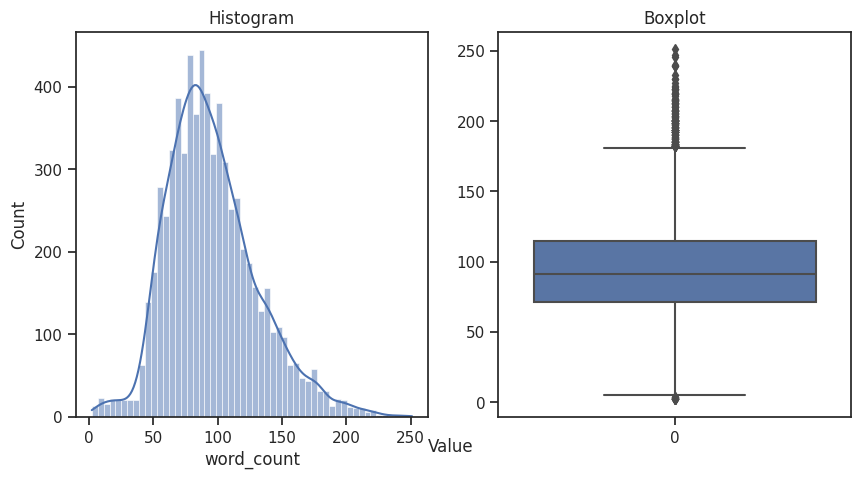

In [100]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram using seaborn on the first axis
sns.histplot(data['word_count'], ax=ax1, kde = True)
ax1.set_title('Histogram')

# Plot the boxplot using seaborn on the second axis
sns.boxplot(data['word_count'], ax=ax2)
ax2.set_title('Boxplot')

# Add a common x-axis label
fig.text(0.5, 0.04, 'Value', ha='center')

# Show the plot
plt.show()


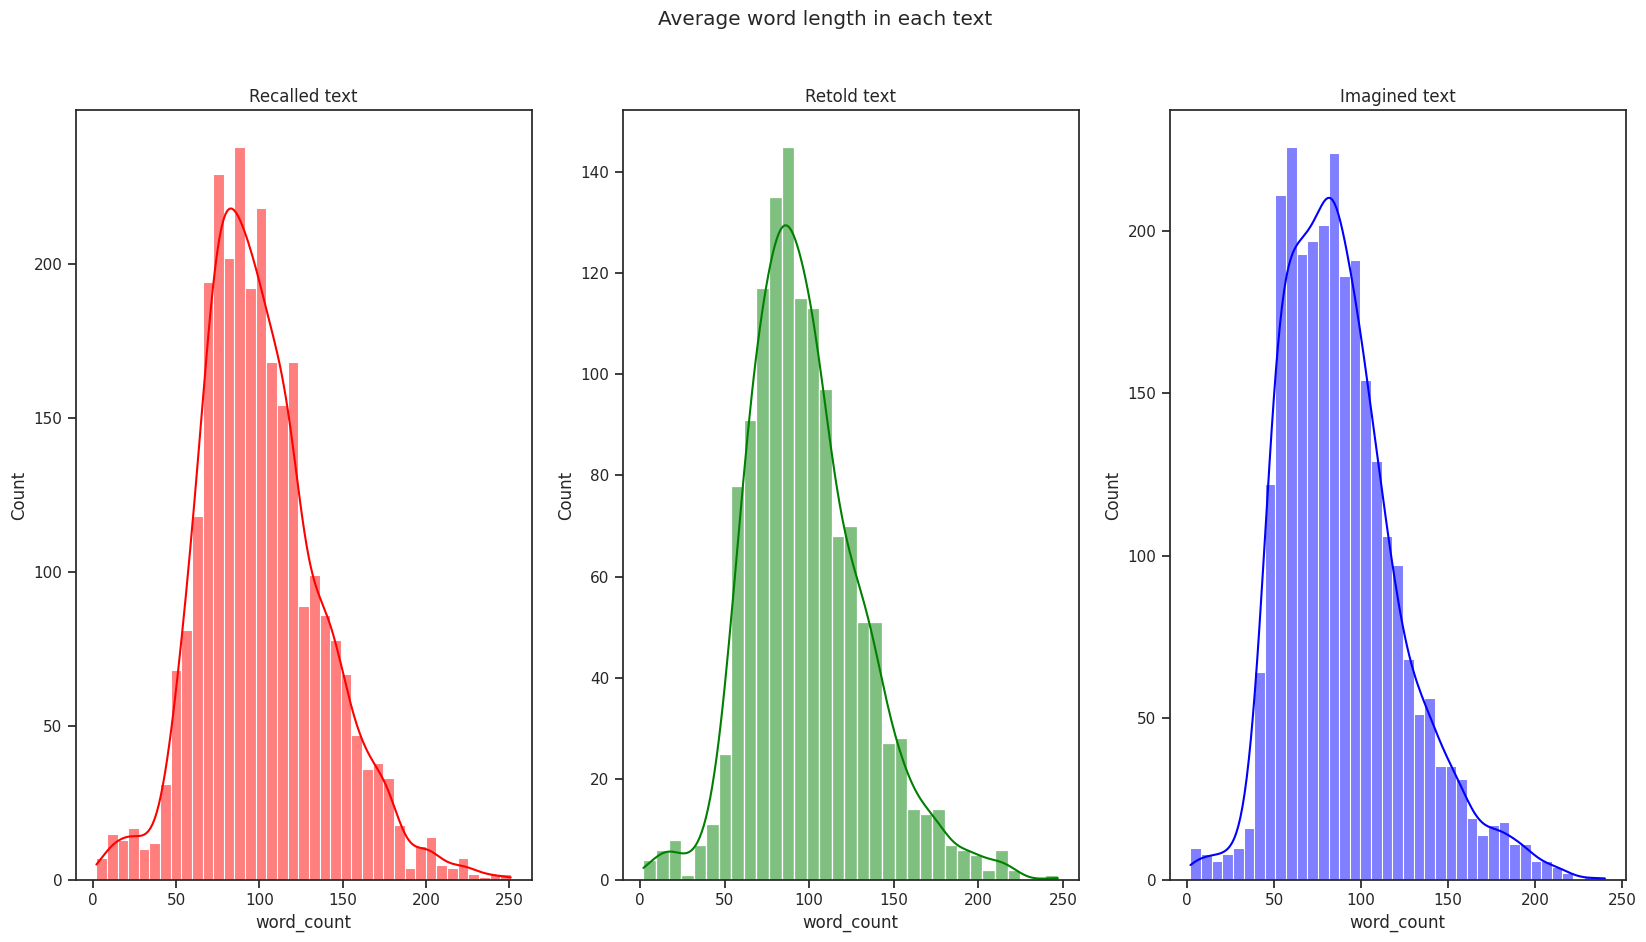

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# Plot histogram with distribution line for recalled text
word = data[data['memType'] == 'recalled']['word_count']
sns.histplot(word, ax=ax1, color='red', kde=True)
ax1.set_title('Recalled text')

# Plot histogram with distribution line for retold text
word = data[data['memType'] == 'retold']['word_count']
sns.histplot(word, ax=ax2, color='green', kde=True)
ax2.set_title('Retold text')

# Plot histogram with distribution line for imagined text
word = data[data['memType'] == 'imagined']['word_count']
sns.histplot(word, ax=ax3, color='blue', kde=True)
ax3.set_title('Imagined text')

fig.suptitle('Average word length in each text')

# Display the plot
plt.show()


# 🧮 Text transformation into vectors

In [102]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X = data['story_preprocessed']


# Machine learning
label_encoder = LabelEncoder()
y = data['memType']
y = label_encoder.fit_transform(y)

In [103]:
# Split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42)

# Create the pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(min_df=0.05)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(multi_class = 'ovr')),  # train on TF-IDF vectors with Logistic Regression
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.5325054784514244


In [105]:
bow = pipeline.named_steps['bow'].transform(X_train).toarray()
tfidf = pipeline.named_steps['tfidf'].transform(bow).toarray()

In [106]:
# Preprocessing pipeline
preprocessor = Pipeline([
    ('bow', CountVectorizer(min_df=0.05)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()) # integer counts to weighted TF-IDF scores
])
def trying_models(preprocessor, model):

    pipelined_model = Pipeline([
        ("preprocessing_pipeline", preprocessor),
        ("modelling",model)
    ])

    return pipelined_model

In [107]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


models_to_try = [LogisticRegression(multi_class = 'ovr'),
                SVC(kernel = "linear"),
                KNeighborsClassifier(n_neighbors = 5),
                SVC(kernel = "poly", degree = 2),
                SVC(kernel = "poly", degree = 3),
                SVC(kernel = "poly", degree = 4),
                SVC(kernel = "rbf"),
                DecisionTreeClassifier(),
                AdaBoostClassifier(),
                RandomForestClassifier(),
                ]

models_names = ["logreg",
               "svc_linear",
               "neighbors_five",
               "svc_poly_2",
               "svc_poly_3",
               "svc_poly_4",
               "svc_rbf",
               "decision_tree_classifier",
               "adaboost",
               "random_forest"]

In [108]:
%%time

from sklearn.metrics import accuracy_score, f1_score

accuracies = []

for model_name, model_to_try in zip(models_names, models_to_try):
    print("-"*100)
    print(f"Classification using the {model_name} model:")

    # Train
    fitted_model = trying_models(preprocessor, model_to_try).fit(X_train, y_train)

    # Predict
    temporary_predictions = fitted_model.predict(X_test)

    # Score
    accuracy = round(accuracy_score(y_test, temporary_predictions), 2)
    accuracies.append(accuracy)
    print(f'Accuracy: {accuracy}')
    f1_macro = round(f1_score(y_test, y_pred, average='macro'), 2)
    print(f'f1_macro: {f1_macro}')
    f1_weighted = round(f1_score(y_test, y_pred, average='weighted'), 2)
    print(f'f1_weighted : {f1_weighted}')

    # # CONFUSION MATRIX

    # cm = confusion_matrix(y_test, temporary_predictions, labels = [0,1])
    # disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1])
    # disp.plot()
    # plt.show()


----------------------------------------------------------------------------------------------------
Classification using the logreg model:
Accuracy: 0.53
f1_macro: 0.42
f1_weighted : 0.49
----------------------------------------------------------------------------------------------------
Classification using the svc_linear model:
Accuracy: 0.53
f1_macro: 0.42
f1_weighted : 0.49
----------------------------------------------------------------------------------------------------
Classification using the neighbors_five model:
Accuracy: 0.41
f1_macro: 0.42
f1_weighted : 0.49
----------------------------------------------------------------------------------------------------
Classification using the svc_poly_2 model:
Accuracy: 0.52
f1_macro: 0.42
f1_weighted : 0.49
----------------------------------------------------------------------------------------------------
Classification using the svc_poly_3 model:
Accuracy: 0.5
f1_macro: 0.42
f1_weighted : 0.49
------------------------------------

In [ ]:
X_train_vectorized = pd.DataFrame(preprocessor.fit_transform(X_train, y_train).toarray())
random_forest = RandomForestClassifier()
random_forest.fit(X_train_vectorized, y_train)
random_forest.get_params();

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [85, 110, 112, 114, 115, 117, 118, 120],
    'max_depth': [11, 12, 13],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to find the best model
grid_search.fit(X_train_vectorized, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_model = grid_search.best_estimator_.fit(X_train_vectorized, y_train)

In [ ]:
# Transforming X_test
X_test_transformed = preprocessor.transform(X_test).toarray()

# predictions
temporary_predictions = best_model.predict(X_test_transformed)

# scoring
rf_accuracy = accuracy_score(y_test, temporary_predictions)
round(rf_accuracy, 2)

In [ ]:
from sklearn.metrics import classification_report

target_names = data['memType'].unique()
clf_report = pd.DataFrame(classification_report(y_test, y_pred, target_names=target_names, output_dict=True))

# Plot the heatmap of the classification report
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True, cmap='Blues', ax=ax)
ax.set_title('Classification Report Heatmap')
plt.show()

# 🧠 Deep Learning

In [ ]:
! pip install tensorflow
! pip install transformers

In [ ]:
# Defining variables
# X = data['story_preprocessed']
X = data['story']
y = pd.get_dummies(data['memType'])
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train

## 🧩 Embeddings

### Context Oblivious: 🧤Glove, ⚡FastText, Word2Vec

In [ ]:
import gensim.downloader
# Print the available pretrained word embedding models:
# print(list(gensim.downloader.info()['models'].keys()))

# Load pre-trained word embedding models
model_glove = gensim.downloader.load('glove-wiki-gigaword-100')
# model_fasttext = gensim.downloader.load('fasttext-wiki-news-subwords-300')
# model_word2vec = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
# def generate_sentence_embeddings(input_sentences, model):

#   """Generate sentence level embeddings
#   """

#   input_sentences_tokenized = input_sentences.apply(lambda x: x.split()) # tokenize
#   input_sentences_tokenized = np.array(input_sentences_tokenized.apply(lambda x: np.array(list(set(x))))) # create a dictionary using set

#   embedding = []

#   for sentence in input_sentences_tokenized:

#     vector = [model[word] for word in sentence if word in model]
#     if vector:
#       sentence_vec = np.mean(vector, axis=0)
#       embedding.append(sentence_vec)

#   return embedding

def generate_word_embeddings(input_sentences, model):

  """Generate word level embeddings
  """

  input_sentences_tokenized = input_sentences.apply(lambda x: x.split()) # tokenize
  input_sentences_tokenized = np.array(input_sentences_tokenized.apply(lambda x: np.array(list(set(x))))) # create a dictionary using set

  embedding_word_level = []

  for sentence in input_sentences_tokenized:

    vector = [model[word] for word in sentence if word in model]
    # if vector:
    #   embedding_word_level.append(np.array(vector))
    embedding_word_level.append(np.array(vector))

  return np.array(embedding_word_level)

In [ ]:
# embedding_models = [model_glove, model_fasttext, model_word2vec]
embedding_models = [model_glove]
datasets_list = [X_train, X_val, X_test]

In [ ]:
# # SENTENCE LEVEL - Embeddings using pre-trained Glove, FastText, Word2vec
# glove_embeddings = [generate_sentence_embeddings(dataset, model) for model in embedding_models if model == model_glove for dataset in datasets_list]
# fasttext_embeddings = [generate_sentence_embeddings(dataset, model) for model in embedding_models if model == model_fasttext for dataset in datasets_list]
# word2vec_embeddings = [generate_sentence_embeddings(dataset, model) for model in embedding_models if model == model_word2vec for dataset in datasets_list]

In [ ]:
# WORD LEVEL - Embeddings using pre-trained Glove, FastText, Word2vec
glove_embeddings = [generate_word_embeddings(dataset, model) for model in embedding_models if model == model_glove for dataset in datasets_list]
# fasttext_embeddings = [generate_word_embeddings(dataset, model) for model in embedding_models if model == model_fasttext for dataset in datasets_list]
# word2vec_embeddings = [generate_word_embeddings(dataset, model) for model in embedding_models if model == model_word2vec for dataset in datasets_list]

In [ ]:
# # PADDING - Sentence level
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# X_train_glove = pad_sequences(glove_embeddings[0], dtype='float32', padding='post', maxlen=200)
# X_val_glove = pad_sequences(glove_embeddings[1], dtype='float32', padding='post', maxlen=200)
# X_test_glove = pad_sequences(glove_embeddings[2], dtype='float32', padding='post', maxlen=200)

In [ ]:
# PADDING - Word level
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_glove = pad_sequences(glove_embeddings[0], dtype='float32', padding='post', maxlen=200)
X_val_glove = pad_sequences(glove_embeddings[1], dtype='float32', padding='post', maxlen=200)
#X_train_fasttext = pad_sequences(fasttext_embeddings[0], dtype='float32', padding='post', maxlen=200)
#X_val_fasttext = pad_sequences(fasttext_embeddings[1], dtype='float32', padding='post', maxlen=200)
# X_train_word2vec= pad_sequences(word2vec_embeddings[0], dtype='float32', padding='post', maxlen=200)
# X_val_word2vec= pad_sequences(word2vec_embeddings[1], dtype='float32', padding='post', maxlen=200)

### Context Sensitive: 📚 BERT

In [ ]:
# ! pip install transformers
# from transformers import AutoModel, BertTokenizer, BertModel, TFBertForSequenceClassification, AdamW
# import tensorflow_hub as hub

# #tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/neuromatch/bert-based-uncased') # Bert tokenizer
# model = BertModel.from_pretrained('/content/drive/MyDrive/neuromatch/bert-base-uncased' , local_files_only=True) # Bert model

# bert_model_name = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"  # Example: BERT-base uncased model from TensorFlow Hub
# bert_layer = hub.KerasLayer(bert_model_name, trainable=True)

# # Modelling
# model = tf.keras.Sequential([
#     bert_layer,
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(input_ids, labels, epochs=num_epochs, batch_size=batch_size)

### 📊 Representational Similarity Analysis (RSA)


In [ ]:
def preprocess_data_for_rsa(array, y_train):

    y_df = pd.DataFrame(y_train)
    y_train_reset = y_df.reset_index(drop=True)

    df = pd.DataFrame(array)

    df_reset = df.reset_index(drop=True)
    df_reset['memType'] = y_train_reset
    df_reset = df_reset.sort_values(by='memType').iloc[:,:-1]
    df_reset = df.reset_index(drop=True)

    return df_reset

In [ ]:
bow_df_reset = preprocess_data_for_rsa(bow, y_train)
tfidf_df_reset = preprocess_data_for_rsa(tfidf, y_train)
glove_embedding_reset = preprocess_data_for_rsa(X_train_glove, y_train)
fasttext_embedding_reset = preprocess_data_for_rsa(X_train_fasttext, y_train)
# word2vec_embedding_reset = preprocess_data_for_rsa(word2vec_embedding_train, y_train)

In [ ]:
from scipy.spatial.distance import pdist, squareform

def compute_similarity_matrices(dfs, titles):
    RSAs = []
    for df in dfs:
        RSA = 1 - squareform(pdist(df, metric='cosine'))
        RSAs.append(RSA)

    fig, axs = plt.subplots(1, len(dfs), figsize=(10, 5))

    for RSA, ax, title in zip(RSAs, axs, titles):
        sns.heatmap(RSA, ax=ax, cmap='viridis')
        ax.set_title(title)

    plt.tight_layout()
    plt.show()


In [ ]:
freq_dfs = [bow_df_reset, tfidf_df_reset]
freq_titles = ['Bag of Words RSA', 'Tf-idf RSA']

compute_similarity_matrices(freq_dfs, freq_titles)

In [ ]:
embedding_dfs = [glove_embedding_reset, fasttext_embedding_reset, word2vec_embedding_reset]
embedding_titles = ['Glove Word Embedding RSA', 'Fasttext Word Embedding RSA', 'Word2vec Word Embedding RSA']

compute_similarity_matrices(embedding_dfs, embedding_titles)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'bow_df_reset' and 'tfidf_df_reset' are your dataframes
pca = PCA(n_components=2)

# Perform PCA on the two datasets
bow_pca = pca.fit_transform(bow_df_reset.iloc[:, :-1])
tfidf_pca = pca.fit_transform(tfidf_df_reset.iloc[:, :-1])

# Define parameters for the plot
num = 15
categs = 3
colors = ['blue', 'orange', 'magenta']
labels = ['imagined', 'recalled', 'retold']
markers = ['o', 'x', 's']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot PCA for bow_df
for i in range(categs):
   axs[0].scatter(bow_pca[i*num:(i+1)*num, 0],
               bow_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[0].legend()
axs[0].set_title('PCA Representation of the Bag of Words')
axs[0].set_xlabel('PC 1')
axs[0].set_ylabel('PC 2')

# Plot PCA for tfidf_df
for i in range(categs):
   axs[1].scatter(tfidf_pca[i*num:(i+1)*num, 0],
               tfidf_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[1].legend()
axs[1].set_title('PCA Representation of the Tf-idf')
axs[1].set_xlabel('PC 1')
axs[1].set_ylabel('PC 2')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'bow_df_reset' and 'tfidf_df_reset' are your dataframes
pca = PCA(n_components=2)

# Perform PCA on the two datasets
glove_pca = pca.fit_transform(glove_embedding_reset)
fasttext_pca = pca.fit_transform(fasttext_embedding_reset)
word2vec_pca = pca.fit_transform(word2vec_embedding_reset)

# Define parameters for the plot
num = 15
categs = 3
colors = ['blue', 'orange', 'magenta']
labels = ['imagined', 'recalled', 'retold']
markers = ['o', 'x', 's']

# Create a figure with two subplots
fig, axs = plt.subplots(1,3, figsize=(16, 8))

# Plot PCA for Glove
for i in range(categs):
   axs[0].scatter(glove_pca[i*num:(i+1)*num, 0],
               glove_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[0].legend()
axs[0].set_title('PCA Representation of the Glove')
axs[0].set_xlabel('PC 1')
axs[0].set_ylabel('PC 2')

# Plot PCA for Fasttext
for i in range(categs):
   axs[1].scatter(fasttext_pca[i*num:(i+1)*num, 0],
               fasttext_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[1].legend()
axs[1].set_title('PCA Representation of the Fasttext')
axs[1].set_xlabel('PC 1')
axs[1].set_ylabel('PC 2')


# Plot PCA for Word2vec
for i in range(categs):
   axs[2].scatter(word2vec_pca[i*num:(i+1)*num, 0],
               word2vec_pca[i*num:(i+1)*num, 1],
               c=colors[i],
               marker=markers[i], label=labels[i])
axs[2].legend()
axs[2].set_title('PCA Representation of the Word2vec')
axs[2].set_xlabel('PC 1')
axs[2].set_ylabel('PC 2')

plt.tight_layout()
plt.show()

#### Other methods to compute RSA

In [ ]:
# Preprocess the data to compute Representational Similarity Analysis

# Reset y_train indices
y_train_reset = y_train.reset_index(drop=True)

# Reset bow_df and tfidf_df indices
bow_df_reset = bow_df.reset_index(drop=True)
tfidf_df_reset = tfidf_df.reset_index(drop=True)

# Concatenate bow_df_reset and tfidf_df_reset with y_train_reset
bow_df_reset = pd.concat([bow_df_reset, y_train_reset], axis=1)
tfidf_df_reset = pd.concat([tfidf_df_reset,y_train_reset], axis = 1)

# Sort values based on memType column
bow_df_reset = bow_df_reset.sort_values(by='memType').iloc[:,:-1]
tfidf_df_reset = tfidf_df_reset.sort_values(by='memType').iloc[:,:-1]

In [ ]:
glove_embedding_reset = glove_embedding_train.reset_index(drop=True)
glove_embedding_reset = pd.concat([glove_embedding_reset, y_train_reset], axis=1)
glove_embedding_reset = glove_embedding_reset.sort_values(by='memType').iloc[:,:-1]

fasttext_embedding_reset = fasttext_embedding_train.reset_index(drop=True)
fasttext_embedding_reset = pd.concat([fasttext_embedding_reset, y_train_reset], axis=1)
fasttext_embedding_reset = fasttext_embedding_reset.sort_values(by='memType').iloc[:,:-1]

word2vec_embedding_reset = word2vec_embedding_train.reset_index(drop=True)
word2vec_embedding_reset = pd.concat([word2vec_embedding_reset, y_train_reset], axis=1)
word2vec_embedding_reset = word2vec_embedding_reset.sort_values(by='memType').iloc[:,:-1]

**Method 1:** using pdist function

In [ ]:
from scipy.spatial.distance import pdist, squareform

# Compute similarity matrices
bow_RSA = 1 - squareform(pdist(bow_df_reset.iloc[0:100,0:100], metric='cosine'))
tfidf_RSA = 1 - squareform(pdist(tfidf_df_reset.iloc[0:100,0:100], metric='cosine'))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot heatmaps
sns.heatmap(bow_RSA, ax=ax1, cmap='viridis')
ax1.set_title('Bag of Words RSA')

sns.heatmap(tfidf_RSA, ax=ax2, cmap='viridis')
ax2.set_title('Tf-idf RSA')

plt.tight_layout()
plt.show()

**Method 2:** using the dot product after normalization

Note:

If your data is already normalized (i.e., each row of data1 has a Euclidean norm of 1), then data1 @ data1.T will indeed give you a matrix of cosine similarities. However, if your data is not normalized, you'll need to normalize it first. Here's how you can do it:

Normalize the data
data1_normalized = data1 / np.linalg.norm(data1, axis=1, keepdims=True)

Compute the matrix of cosine similarities
RSA = data1_normalized @ data1_normalized.T

In [ ]:
bow_df_norm = bow_df_reset.iloc[0:100,0:100] / np.linalg.norm(bow_df_reset.iloc[0:100,0:100], axis=1, keepdims=True)
bow_RSA = bow_df_norm.iloc[0:100,0:100] @ bow_df_norm.iloc[0:100,0:100].T

tfidf_df_norm = tfidf_df_reset.iloc[0:100,0:100] / np.linalg.norm(tfidf_df_reset.iloc[0:100,0:100], axis=1, keepdims=True)
tfidf_RSA = tfidf_df_norm.iloc[0:100,0:100] @ tfidf_df_norm.iloc[0:100,0:100].T

# Plot the respective RSA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot heatmaps
sns.heatmap(bow_RSA, ax=ax1, cmap='viridis')
ax1.set_title('Bag of Words RSA')

sns.heatmap(tfidf_RSA, ax=ax2, cmap='viridis')
ax2.set_title('Tf-idf RSA')

plt.tight_layout()
plt.show()

## 🔄🔢LSTM

In an LSTM, information flows through time steps, and is retained and processed through its *memory cell state*.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import models, layers

def init_model():
    model = Sequential()
    model.add(layers.LSTM(20, input_shape=(200, 50), # (max number of words, ndim of each word)
                          activation='tanh',
                          kernel_regularizer='l2',
                          recurrent_regularizer='l2'))  # Add L2 regularization to LSTM weights))
    # model.add(layers.Dropout(0.5))
    model.add(layers.Dense(20, activation='relu'))
    # model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation='softmax')) # Final predictive layer

    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    return model

model = init_model()

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model = init_model()

history = model.fit(
    X_train_glove, # CHANGE X_TRAIN TYPE OF EMBEDDINGS
    y_train,
    batch_size=16,
    epochs=20,
    validation_data=(X_val_glove, y_val),
    callbacks=[es]
)

# Access the training and validation losses from the history object
train_losses = history.history['loss']
val_losses = history.history['val_loss']

In [ ]:
# Plot training and validation loss in each epoch.

plt.figure()
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions using the trained model
y_pred = model.predict(X_val_glove)

# Convert the predicted probabilities to class labels (if your model returns probabilities)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming y_val is one-hot encoded, convert it back to class labels (if needed)
y_true_classes = np.argmax(y_val, axis=1)

In [ ]:
from sklearn.metrics import classification_report

target_names = data['memType'].unique()
clf_report = pd.DataFrame(classification_report(y_true_classes, y_pred_classes, target_names=target_names, output_dict=True))

# Plot the heatmap of the classification report
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(clf_report.iloc[:-1, :].T, annot=True, cmap='Blues', ax=ax)
ax.set_title('Classification Report Heatmap')
plt.show()

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [ ]:
def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness. NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')


# In case that `DataLoader` is used
def seed_worker(worker_id):
  """
  DataLoader will reseed workers following randomness in
  multi-process data loading algorithm.

  Args:
    worker_id: integer
      ID of subprocess to seed. 0 means that
      the data will be loaded in the main process
      Refer: https://pytorch.org/docs/stable/data.html#data-loading-randomness for more details

  Returns:
    Nothing
  """
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

In [ ]:
def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
        "if possible, in the menu under `Runtime` -> "
        "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

In [ ]:
SEED = 2021
set_seed(seed=SEED)
device = set_device()

In [ ]:
class CiceroNet(nn.Module):
  """
  A Linear Neural Net with one word embedding layer +  hidden layer
  """
  def __init__(self, embed_dim, hidden_dim, output_dim):

      """
      Initialize Ciceronet parameters

      Args:
      emebed_dim: int
      Embedding dimension
      out_dim: int
      Ouput dimension
      hid_dim: int
      Hidden dimension

      Returns: nothing

      """
      super(CiceroNet, self).__init__()
      self.fc1 = nn.Linear(embed_dim, hidden_dim)
      self.fc2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
      """
      Forward pass of Ciceronet

      Args:
      x: torch.Tensor
      Input tensor

      Returns:
      hid: torch.Tensor
      Hidden layer activity
      out: torch.Tensor
      Output/Prediction
      """
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return F.log_softmax(x, dim=3)


In [ ]:
class MemoriesData(Dataset):

  def __init__(self, data_list, targets):
    self.data = data_list
    self.targets = targets

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    data = torch.tensor(self.data[idx], dtype=torch.float32)
    target = torch.tensor(self.targets[idx], dtype=torch.long)
    return data, target


In [ ]:
# Instantiate MemoriesData function on our train, val, and test sets
train_data = MemoriesData(glove_embedding_train, y_train)
val_data = MemoriesData(glove_embedding_val, y_val)
test_data = MemoriesData(glove_embedding_test, y_test)

In [ ]:
## DO WE NEED THIS? ##
g_seed = torch.Generator()
g_seed.manual_seed(SEED)

# Instantiate the dataloader to load your data in batches
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True, worker_init_fn=seed_worker) # generator = g_seed IS IT USEFUL FOR US?
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True, worker_init_fn=seed_worker) # generator = g_seed IS IT USEFUL FOR US?

In this function:

**model** is the PyTorch model to train.

**train_loader** and **val_loader** are PyTorch DataLoader objects for the training and validation data, respectively.

**epochs** is the number of training epochs.

**optimizer** is a PyTorch optimizer object (like torch.optim.SGD or torch.optim.Adam).

**criterion** is a PyTorch loss function object (like nn.CrossEntropyLoss).

**device** is a torch.device object representing the device on which the computations will be performed. This can be either a CPU or a GPU, depending on your setup and the availability of these resources.

This function trains the model in the training phase, and then validates the model in the validation phase. The model's parameters are updated in the training phase, and then the model's performance is evaluated on the validation data. During the validation phase, the model is set to evaluation mode (**.eval()**), and no gradients are computed (with **torch.no_grad()**). This is to save memory and compute resources during the validation phase.

In [ ]:
def train_model(model, train_loader, val_loader, epochs, optimizer, criterion, device):

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # clear gradients
            outputs = model(inputs)  # forward pass
            loss = criterion(outputs, labels)  # compute loss
            loss.backward()  # backpropagation
            optimizer.step()  # update weights

            train_loss += loss.item() * inputs.size(0)

        # calculate average losses
        train_loss = train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # print training/validation statistics
        if (epoch + 1) % 50 == 0:  # print every 50 epochs
          print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch + 1, train_loss))

          # validate the model
          model.eval()
          val_loss = 0.0
          correct = 0
          total = 0
          with torch.no_grad():
              for inputs, labels in val_loader:
                  inputs, labels = inputs.to(device), labels.to(device)
                  outputs = model(inputs)
                  loss = criterion(outputs, labels)
                  val_loss += loss.item() * inputs.size(0)

                  _, predicted = torch.max(outputs.data, 1)
                  total += labels.size(0)
                  correct += (predicted == labels).sum().item()

          val_loss = val_loss / len(val_loader.dataset)
          val_losses.append(val_loss)

          val_acc = correct / total
          print('Validation Loss: {:.6f} \tValidation Accuracy: {:.6f}'.format(val_loss, val_acc))

    return train_losses, val_losses

In [ ]:
# Define model parameters
embed_dim = 300     # dimension of word embedding vector
hidden_dim = 500    # number of nodes in the hidden layer
output_dim = 3      # number of classes

# Instantiate the model
model = CiceroNet(embed_dim, hidden_dim, output_dim)

# Move the model to the device
model = model.to(device)

# Set the optimizer and the loss function (criterion)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Set the number of epochs
epochs = 500

In [ ]:
train_losses, val_losses = train_model(model, train_dataloader, test_dataloader, epochs, optimizer, criterion, device)

In [ ]:
# Plot your training and validation loss in each epoch.

plt.figure()
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In this function:

**model** is the PyTorch model to test.

**test_loader** is a PyTorch DataLoader object for the test data.

**device** is a torch.device object representing the device on which the computations will be performed. This can be either a CPU or a GPU, depending on your setup and the availability of these resources.

This function sets the model to evaluation mode (**.eval()**) and then runs the model on the test data without computing gradients (with **torch.no_grad()**). The accuracy of the model on the test data is then computed and printed.

In [ ]:
def test_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Test Accuracy: {:.2f}%'.format(100 * correct / total))


In [ ]:
test_model(model,test_dataloader,device)

In [ ]:
# Code from the tutorial

def train(features, labels, model, loss_fun, optimizer, n_epochs):
  """
  Training function

  Args:
    features: torch.Tensor
      Features (input) with shape torch.Size([n_samples, 1])
    labels: torch.Tensor
      Labels (targets) with shape torch.Size([n_samples, 1])
    model: torch nn.Module
      The neural network
    loss_fun: function
      Loss function
    optimizer: function
      Optimizer
    n_epochs: int
      Number of training iterations

  Returns:
    loss_record: list
      Record (evolution) of training losses
  """
  loss_record = []  # Keeping recods of loss

  for i in range(n_epochs):
    optimizer.zero_grad()  # Set gradients to 0
    predictions = model(features)  # Compute model prediction (output)
    loss = loss_fun(predictions, labels)  # Compute the loss
    loss.backward()  # Compute gradients (backward pass)
    optimizer.step()  # Update parameters (optimizer takes a step)

    loss_record.append(loss.item())
  return loss_record


### CHECK THIS PART
set_seed(seed=2021)
epochs = 500
loss_function = nn.CrossEntropyLoss()
sgd_optimizer = torch.optim.Adam
## Uncomment to run
losses = train(train_dataloader, test_dataloader, CiceroNet, loss_function, sgd_optimizer, epochs)
with plt.xkcd():
  ex3_plot(CiceroNet, train_dataloader, test_dataloader, epochs, losses)